In [8]:
import re
import os
import math
from spacy.lang.hi import STOP_WORDS as STOP_WORDS_HI

In [9]:
# global variables
tf = {}
article = input("Enter the article name")

Enter the article name285.txt


In [10]:
# extracting sentences from a given file
def getSent(articleName, directory):
    articleName = directory + '/' + articleName
    f = open(articleName).read()
    sentences = f.split('।')
    return sentences

In [11]:
# cleaning sentences (basic regex for now)
def cleanSent(unclean):
    clean = []
    for sent in unclean:
        sent = re.sub('\\n', '', sent)
        sent = re.sub('[a-zA-z]', '', sent)
        sent = sent.strip()
        if len(sent) != 0:
            clean.append(sent)
    return clean

In [12]:
# calculating tf of all words
def prepTF(clean, doc):
    global tf
    for sent in clean:
        words = sent.split(' ')
        for word in words:
            if (word, doc) in tf:
                tf[(word, doc)] += 1
            else:
                tf[(word, doc)] = 1
    return 

In [13]:
# repeating process for each article to get tf 
def eachArticle(directory):
    documents = os.listdir(directory)
    sorted(documents)
    x = 0
    for doc in documents:
        unclean = getSent(doc, directory)
        clean = cleanSent(unclean)
        prepTF(clean, doc)

In [14]:
eachArticle('valid')

In [15]:
# calculating tfidf for a particular article
def oneArticle(articleName, directory):
    global tf
    df = {}
    unclean = getSent(articleName, directory)
    clean = cleanSent(unclean)
    documents = os.listdir(directory)    
    for sent in clean:
        words = sent.split(' ')
        for word in words:
            if word in df:
                continue
            for doc in documents:
                if (word, doc) in tf:
                    if word in df:
                        df[word] += 1
                    else:
                        df[word] = 1            
    idf = {}
    for word in df:
        if word not in idf:
            idf[word] = math.log(len(documents)/(df[word] + 1))
    
    tfidf = {}
    for word in idf:
        if word not in tfidf:
            tfidf[word] = tf[(word, articleName)] * idf[word]
    
    return tfidf

In [16]:
tfidf = oneArticle(article, 'valid')

In [35]:
# final summary according to highest tfidf of sentences
def getSummary(articleName, directory, tfidf):
    unclean = getSent(articleName, directory)
    clean = cleanSent(unclean)
    heading = clean[0].split(' ')
    slicelen = slice(0, len(clean))
    text = clean[slicelen]
    size = round(0.3 * len(text))
    sent_tfidf = {}
    for sentI in range(0, len(text)):
        w1 = 0
        sent = text[sentI]
        words = sent.split(' ')
        stfidf = 0
        for word in words:
            if word not in STOP_WORDS_HI:
                stfidf += tfidf[word]
                if word in heading:
                    w1 += 5
        sent_tfidf[sentI] = stfidf/len(words) + w1
    sent_tfidf = sorted(sent_tfidf.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
    sent_limit = []
    for i in range(0, size):
        sent_limit.append(sent_tfidf[i])
    sent_limit = sorted(sent_limit)
    summary = ""
    actual = ""
    for i in sent_limit:
        summary += text[i[0]] + " । " 
    for i in range(0, len(text)):
        actual += text[i] + " । "
    summary = clean[0] + summary
    return actual, summary

In [36]:
actual, summary = getSummary(article, 'valid', tfidf)
print(actual)
print("\n")
print(summary)

छत्रपती संभाजी राजे या शम्भाजी मराठा सम्राट और छत्रपति शिवाजी महाराज के उत्तराधिकारी । उस समय मराठाओं के सबसे प्रबल शत्रु मुगल बादशाह औरंगजेब बीजापुर और गोलकुण्डा का शासन हिन्दुस्तान से समाप्त करने में उनकी प्रमुख भूमिका रही । संभाजी राजे अपनी शौर्यता के लिये काफी प्रसिद्ध थे । संभाजी महाराज ने अपने कम समय के शासन काल में 140 युद्ध किये और इसमे एक प्रमुख बात ये थी कि उनकी सेना एक भी युद्ध में पराभूत नहीं हुई । उनके पराक्रम की वजह से परेशान हो कर दिल्ली के बादशाह औरंगजेब ने कसम खायी थी के जब तक छत्रपती संभाजी पकडे नहीं जायेंगे, वो अपना किमोंश सर पर नहीं चढ़ाएगा । छत्रपति संभाजी नौ वर्ष की अवस्था में पुण्यश्लोक छत्रपती श्री छत्रपति शिवाजी महाराज की प्रसिद्ध आगरा यात्रा में वे साथ गये थे । औरंगजेब के बंदीगृह से निकल, पुण्यश्लोक छत्रपती श्री छत्रपति शिवाजी महाराज के महाराष्ट्र वापस लौटने पर, मुगलों से समझौते के फलस्वरूप, संभाजी मुगल सम्राट् द्वारा राजा के पद तथा पंचहजारी मंसब से विभूषित हुए । औरंगाबाद की मुगल छावनी में, मराठा सेना के साथ, उसकी नियुक्ति हुई । युगप्रवर्तक राजा के पुत्र रहते 

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

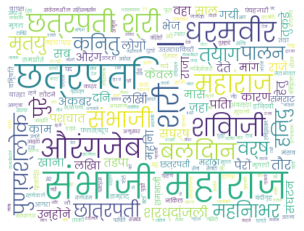

In [20]:
font= "Poppins-Light.ttf"

wordcloud = WordCloud(
    width=400,
    height=300,
    max_font_size=50, 
    max_words=1000,
    background_color="white", 
    stopwords=STOP_WORDS_HI,
    regexp=r"[\u0900-\u097F]+", 
    font_path=font
).generate(summary)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()